## 0. 국립공원공단 로드킬 데이터

- 국립공원명, 조사일자, 자원명, 경도, 위도로 구성된 데이터
- 결측치는 존재하지 않는다.
- 국립공원

    > '한려해상', '태안해안', '태백산', '치악산', '내장산', '월출산', '오대산', '경주', '속리산',
    > '주왕산', '지리산', '다도해해상', '변산반도', '월악산', '덕유산', '설악산', '소백산', '계룡산',
    > '무등산', '가야산'

- 조사는 2011~2023년도에 실시 (2019~2022년도 데이터를 사용하여 분석)
- 자원명
    > '멧새', '청설모', '능구렁이', '고라니', '까치', '족제비', '다람쥐', '동박새', '곤줄박이',
    > '참새', '직박구리', '두더지', '큰부리까마귀', '대륙유혈목이', '오소리', '멧비둘기', '너구리', '꿩',
    > '쇠살모사', '흰넓적다리붉은쥐', '무자치', '딱새', '참개구리', '까치살모사', '들꿩', '누룩뱀',
    > '유혈목이', '멧토끼', '북방산개구리', '무당개구리', '살모사', '집쥐', '고슴도치', '두꺼비',
    > '호랑지빠귀', '소쩍새', '청딱다구리', '멧돼지', '어치', '큰산개구리', '되지빠귀', '노루',
    > '물두꺼비', '되솔새', '노랑할미새', '대륙밭쥐', '물까치', '붉은머리오목눈이', '고양이', '계곡산개구리',
    > '쏙독새', '개똥지빠귀', '맹꽁이', '오색딱다구리', '멧밭쥐', '흰배지빠귀', '옴개구리', '굴뚝새',
    > '까마귀', '노랑턱멧새', '유리딱새', '파랑새', '생쥐', '큰유리새', '큰소쩍새', '호반새', '쇠박새',
    > '쑥새', '한국꼬리치레도롱뇽', '알락할미새', '쇠딱다구리', '박새', '뻐꾸기', '메추라기', '등줄쥐',
    > '붉은귀거북', '오목눈이', '황조롱이', '한국산개구리', '숲새', '왜가리', '찌르레기', '원앙',
    > '우수리땃쥐', '바다직박구리', '제비', '방울새', '땃쥐', '동고비', '때까치', '양진이', '칡때까치',
    > '쇠유리새', '도마뱀', '물까마귀', '쇠솔딱새', '아무르장지뱀', '쇠부엉이'

- 다람쥐, 고라니, 청설모, 너구리, 누룩뱀, 유혈목이, 능구렁이, 쇠살모사, 두꺼비, 족제비가 로드킬을 많이 당했다.


In [1]:
import pandas as pd
df = pd.read_csv('./data/국립공원공단_국립공원 로드킬 정보_20231220.csv', encoding='cp949')

In [2]:
df.head()

,국립공원명,조사일자,자원명,경도,위도
0,한려해상,2021-10-20,멧새,128.674692,34.752264
1,한려해상,2021-10-13,청설모,128.674692,34.752264
2,한려해상,2021-10-11,청설모,128.674692,34.752264
3,한려해상,2021-09-02,능구렁이,128.674692,34.752264
4,한려해상,2021-07-27,고라니,128.674692,34.752264


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국립공원명   3183 non-null   object 
 1   조사일자    3183 non-null   object 
 2   자원명     3183 non-null   object 
 3   경도      3183 non-null   float64
 4   위도      3183 non-null   float64
dtypes: float64(2), object(3)
memory usage: 124.5+ KB


In [4]:
df.isna().sum()

국립공원명    0
조사일자     0
자원명      0
경도       0
위도       0
dtype: int64

In [5]:
df['국립공원명'].value_counts()

국립공원명
지리산      756
오대산      549
소백산      241
내장산      239
덕유산      221
속리산      193
설악산      189
변산반도     132
한려해상     128
월악산      103
치악산       79
계룡산       72
무등산       57
다도해해상     41
태안해안      39
태백산       39
가야산       30
경주        29
주왕산       28
월출산       18
Name: count, dtype: int64

In [6]:
# datetime으로 변환
df['조사일자'] = pd.to_datetime(df['조사일자'])

start_date = df['조사일자'].min()
end_date = df['조사일자'].max()

print("전체 날짜 범위: {}에서 {}까지".format(start_date, end_date))

전체 날짜 범위: 2011-01-10 00:00:00에서 2023-11-20 00:00:00까지


In [7]:
df['자원명'].unique()

array(['멧새', '청설모', '능구렁이', '고라니', '까치', '족제비', '다람쥐', '동박새', '곤줄박이',
       '참새', '직박구리', '두더지', '큰부리까마귀', '대륙유혈목이', '오소리', '멧비둘기', '너구리', '꿩',
       '쇠살모사', '흰넓적다리붉은쥐', '무자치', '딱새', '참개구리', '까치살모사', '들꿩', '누룩뱀',
       '유혈목이', '멧토끼', '북방산개구리', '무당개구리', '살모사', '집쥐', '고슴도치', '두꺼비',
       '호랑지빠귀', '소쩍새', '청딱다구리', '멧돼지', '어치', '큰산개구리', '되지빠귀', '노루',
       '물두꺼비', '되솔새', '노랑할미새', '대륙밭쥐', '물까치', '붉은머리오목눈이', '고양이', '계곡산개구리',
       '쏙독새', '개똥지빠귀', '맹꽁이', '오색딱다구리', '멧밭쥐', '흰배지빠귀', '옴개구리', '굴뚝새',
       '까마귀', '노랑턱멧새', '유리딱새', '파랑새', '생쥐', '큰유리새', '큰소쩍새', '호반새', '쇠박새',
       '쑥새', '한국꼬리치레도롱뇽', '알락할미새', '쇠딱다구리', '박새', '뻐꾸기', '메추라기', '등줄쥐',
       '붉은귀거북', '오목눈이', '황조롱이', '한국산개구리', '숲새', '왜가리', '찌르레기', '원앙',
       '우수리땃쥐', '바다직박구리', '제비', '방울새', '땃쥐', '동고비', '때까치', '양진이', '칡때까치',
       '쇠유리새', '도마뱀', '물까마귀', '쇠솔딱새', '아무르장지뱀', '쇠부엉이'], dtype=object)

In [8]:
df['자원명'].value_counts()[:10]

자원명
다람쥐     1128
고라니      230
청설모      223
너구리      150
누룩뱀      144
유혈목이     139
능구렁이     109
쇠살모사      95
두꺼비       85
족제비       79
Name: count, dtype: int64

In [9]:
df = df[df['조사일자'].dt.year.isin([2019, 2020, 2021, 2022])]
df['조사일자'].dt.year.unique()

array([2021, 2020, 2022, 2019])

## 1. 시각화

### 연도별 데이터

- 2019년에 비해 2020년과 2021년에는 로드킬 사고가 증가했으나, 2022년에는 다시 감소하는 추세를 보임
- 2019년에는 여름(6월, 7월, 8월)에 로드킬 사고가 증가하는 추세를 보임
- 2020, 2021, 2022년도에 이러한 추세를 보이지 않는 이유는 코로나로 인해 피서를 가는 사람들이 줄어들었기 때문으로 추정
- 2021, 2022에는 봄, 가을에 로드킬 사고가 증가하는 추세를 보임

In [10]:
df['Year'] = df['조사일자'].dt.year
year = df.groupby(['Year']).size()
year

Year
2019    307
2020    132
2021    178
2022    130
dtype: int64

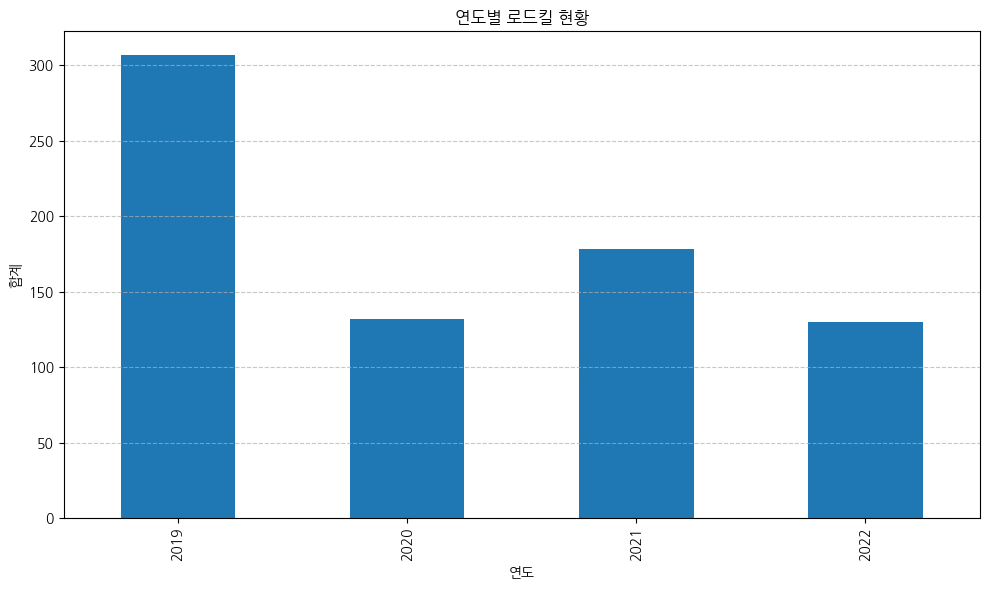

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

year.plot(kind='bar', figsize=(10, 6))
plt.title('연도별 로드킬 현황')
plt.xlabel('연도')
plt.ylabel('합계')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
df['Month'] = df['조사일자'].dt.month
month = df.groupby(['Year', 'Month']).size()
month

Year  Month
2019  1         2
      2         7
      3        13
      4        12
      5        34
      6        46
      7        68
      8        55
      9        44
      10       17
      11        6
      12        3
2020  1         1
      2         4
      3         6
      4        10
      5        23
      6        23
      7        16
      8        11
      9        16
      10       14
      11        5
      12        3
2021  1         2
      2         2
      3        22
      4        10
      5        17
      6        32
      7        31
      8        14
      9        26
      10       17
      11        3
      12        2
2022  1         1
      2         3
      3        14
      4         8
      5         7
      6        21
      7        18
      8        17
      9        18
      10       12
      11        9
      12        2
dtype: int64

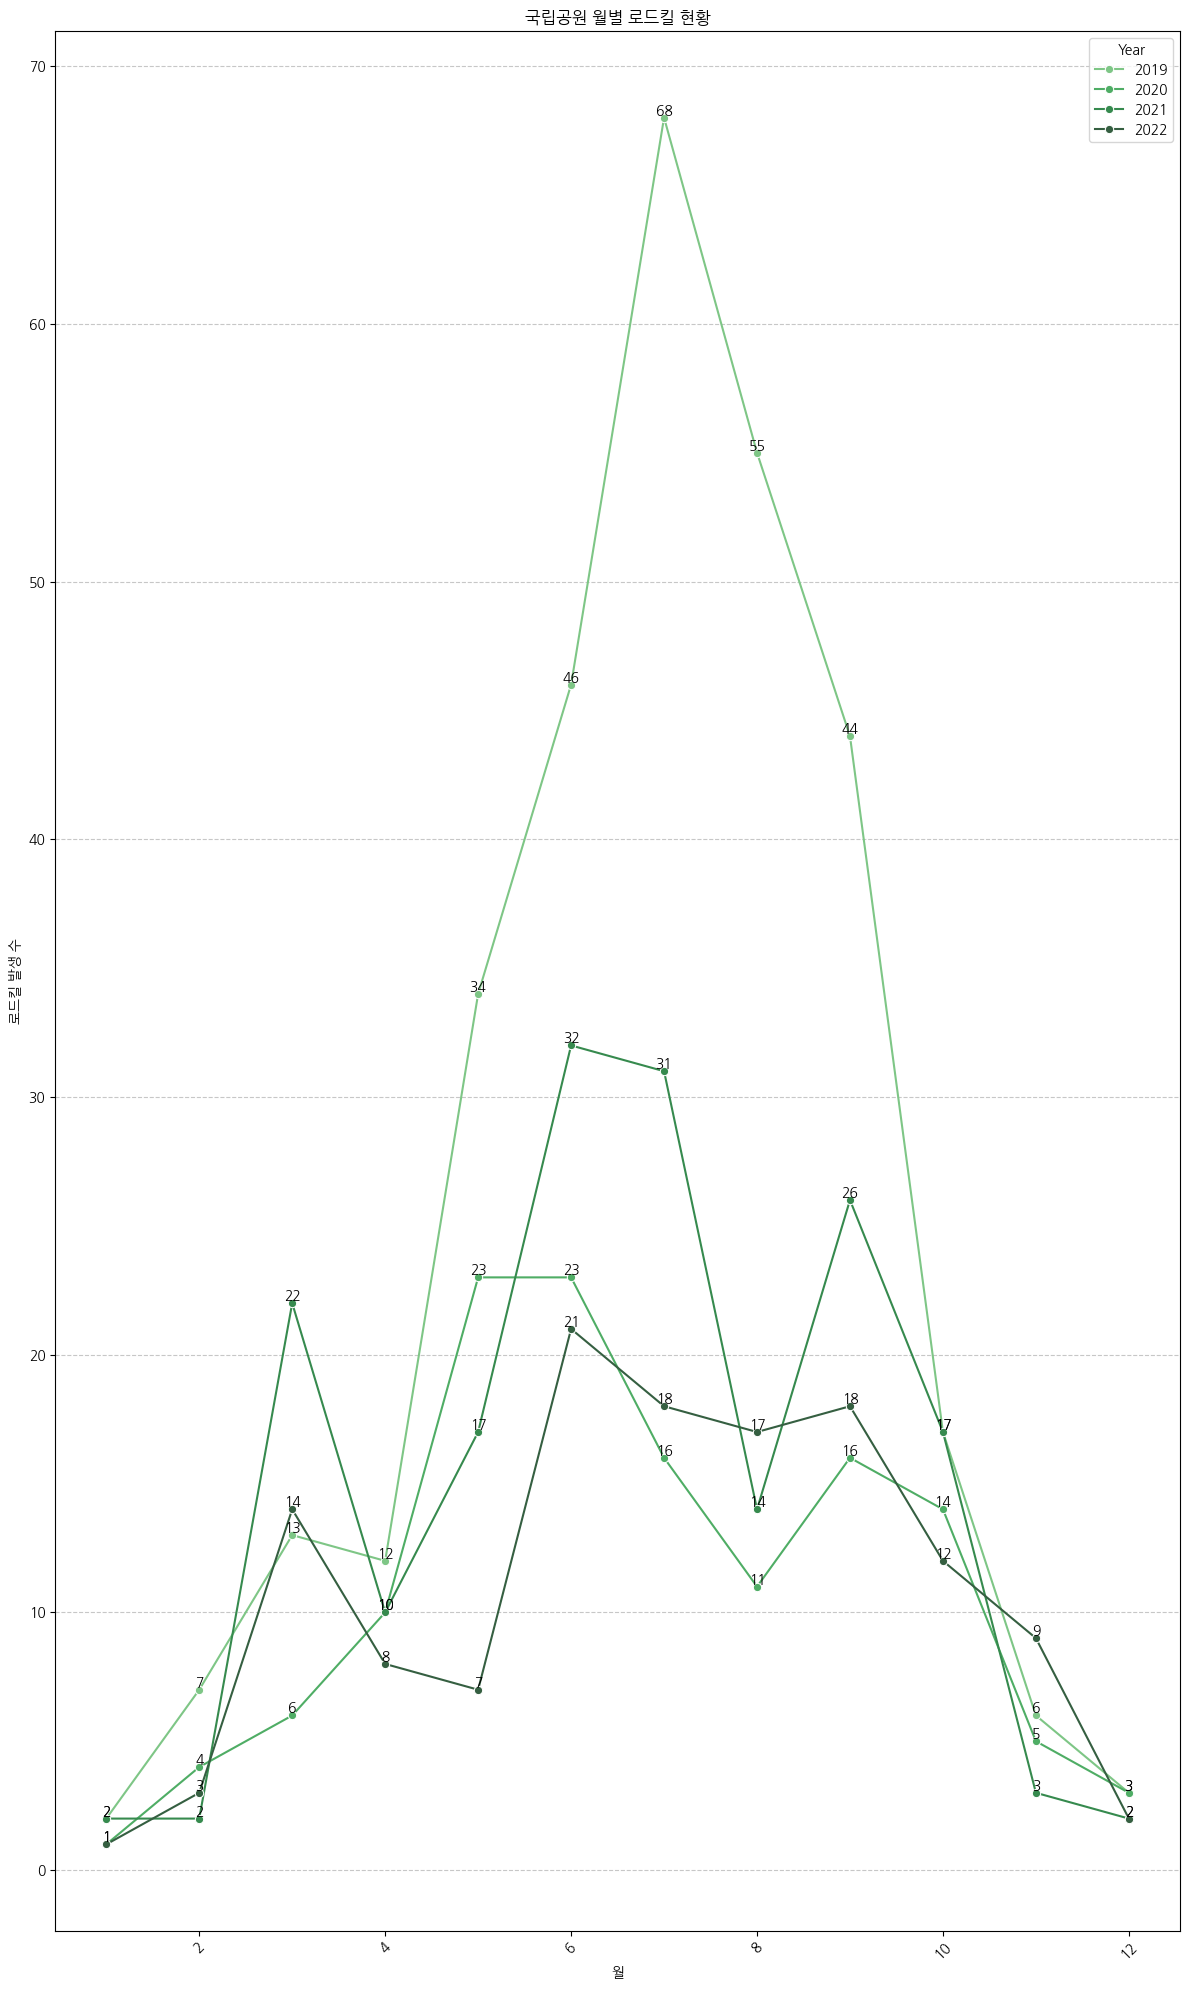

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# month 시리즈를 데이터프레임으로 변환
month_df = month.reset_index(name='Count')

# 초록색 계열 색상 팔레트 생성
green_palette = sns.color_palette("Greens_d", n_colors=len(month_df['Year'].unique()))

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 20))
line_plot = sns.lineplot(data=month_df, x='Month', y='Count', hue='Year', marker='o', palette=green_palette)

# 각 데이터 포인트에 값 표시
for line in line_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.0f}', color='black', ha='center', va='bottom')

plt.title('국립공원 월별 로드킬 현황')
plt.xlabel('월')
plt.ylabel('로드킬 발생 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### 국립공원

- 2019~2022년도 데이터에서 전체 로드킬 수를 비교하면
    - 상위 5개: 지리산, 항려행상, 소백산, 오대산, 설악산
    - 하위 5개: 가야산, 주왕산, 월출산, 경주, 변산반도
- 연도별 분석
    - 로드킬 횟수가 많은 데이터들은 대체로 2019->2020 감소, 2020->2021 증가, 2021->2022 감소
    - 로드킷 횟수가 적은데이터들은 2019->2021 감소, 2021->2022증가 추세를 보이는 곳이 많다.
- 월별 분석
    - 상위 5개: 보통 여름과 가을에 로드킬 횟수가 많다. (소백산의 경우 봄의 로드킬 발생이 더 많음)

In [34]:
df.groupby(['국립공원명']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)[:5]

,국립공원명,Count
15,지리산,156
19,한려해상,125
9,소백산,103
11,오대산,49
8,설악산,44


In [35]:
df.groupby(['국립공원명']).size().reset_index(name='Count').sort_values(by='Count', ascending=True)[:5]

,국립공원명,Count
0,가야산,1
14,주왕산,2
13,월출산,6
1,경주,7
7,변산반도,7


In [101]:
park = df.groupby(['Year', '국립공원명']).size().reset_index(name='Count')
park = park.sort_values(by=['Year', 'Count'], ascending=[False, False])
park

,Year,국립공원명,Count
68,2022,한려해상,23
64,2022,지리산,20
59,2022,소백산,18
62,2022,월악산,12
58,2022,설악산,11
...,...,...,...
14,2019,치악산,4
16,2019,태안해안,4
6,2019,무등산,3
12,2019,주왕산,2


In [102]:
# 연도별 국립공원별 로드킬 현황 (NaN은 0으로 채움)
park_pivot = pd.DataFrame(park.pivot(columns='국립공원명', index='Year', values='Count'))
park_pivot.fillna(0, inplace=True)
park_pivot

국립공원명,가야산,경주,계룡산,내장산,다도해해상,덕유산,무등산,변산반도,설악산,소백산,속리산,오대산,월악산,월출산,주왕산,지리산,치악산,태백산,태안해안,한려해상
Year,,,,,,,,,,,,,,,,,,,,
2019,1.0,5.0,6.0,17.0,27.0,8.0,3.0,0.0,4.0,37.0,12.0,26.0,11.0,0.0,2.0,76.0,4.0,35.0,4.0,29.0
2020,0.0,1.0,3.0,13.0,1.0,3.0,1.0,3.0,7.0,18.0,4.0,6.0,4.0,0.0,0.0,32.0,3.0,0.0,6.0,27.0
2021,0.0,0.0,3.0,3.0,3.0,8.0,1.0,3.0,22.0,30.0,3.0,15.0,3.0,2.0,0.0,28.0,6.0,1.0,1.0,46.0
2022,0.0,1.0,1.0,6.0,9.0,5.0,5.0,1.0,11.0,18.0,4.0,2.0,12.0,4.0,0.0,20.0,4.0,2.0,2.0,23.0


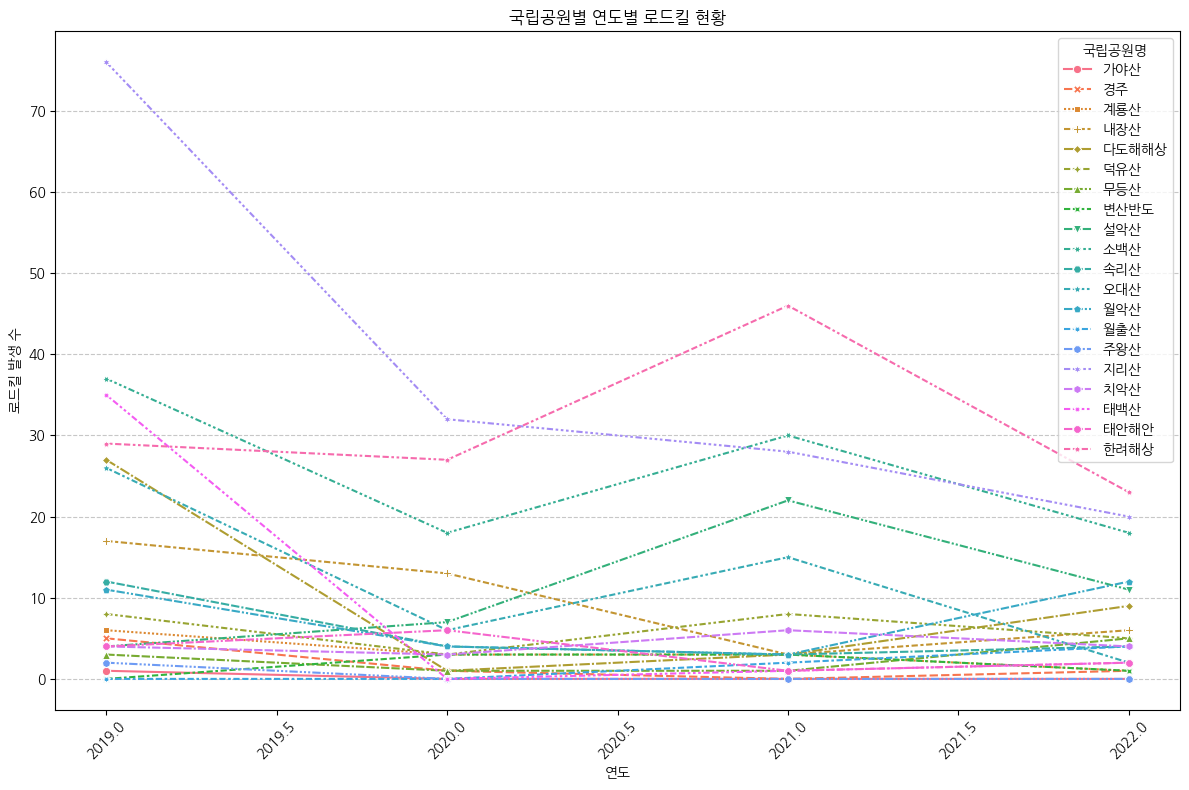

In [103]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.lineplot(data=park_pivot, markers=True)

plt.title('국립공원별 연도별 로드킬 현황')
plt.xlabel('연도')
plt.ylabel('로드킬 발생 수')
plt.xticks(rotation=45)
plt.legend(title='국립공원명', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [104]:
park2 = df.groupby(['Month', '국립공원명']).size().reset_index(name='Count')
park2

,Month,국립공원명,Count
0,1,계룡산,2
1,1,소백산,1
2,1,지리산,2
3,1,태안해안,1
4,2,내장산,1
...,...,...,...
142,12,덕유산,1
143,12,소백산,1
144,12,오대산,1
145,12,지리산,2


In [105]:
# 연도별 국립공원별 로드킬 현황 (NaN은 0으로 채움)
park2_pivot = pd.DataFrame(park2.pivot(columns='국립공원명', index='Month', values='Count'))
park2_pivot.fillna(0, inplace=True)
park2_pivot

국립공원명,가야산,경주,계룡산,내장산,다도해해상,덕유산,무등산,변산반도,설악산,소백산,속리산,오대산,월악산,월출산,주왕산,지리산,치악산,태백산,태안해안,한려해상
Month,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,31.0,3.0,3.0,4.0,0.0,0.0,5.0,1.0,1.0,0.0,2.0
4,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,3.0,5.0,1.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,9.0
5,0.0,0.0,0.0,7.0,6.0,4.0,1.0,0.0,1.0,6.0,1.0,5.0,4.0,0.0,0.0,28.0,1.0,1.0,2.0,14.0
6,0.0,5.0,3.0,7.0,10.0,4.0,5.0,3.0,11.0,5.0,5.0,13.0,3.0,0.0,2.0,28.0,1.0,3.0,1.0,13.0
7,1.0,0.0,3.0,3.0,7.0,2.0,3.0,2.0,9.0,12.0,5.0,8.0,3.0,1.0,0.0,31.0,3.0,12.0,2.0,26.0
8,0.0,0.0,0.0,6.0,7.0,5.0,1.0,1.0,10.0,4.0,2.0,5.0,2.0,0.0,0.0,18.0,2.0,17.0,0.0,17.0
9,0.0,1.0,0.0,7.0,2.0,3.0,0.0,0.0,4.0,23.0,1.0,5.0,7.0,3.0,0.0,23.0,4.0,3.0,3.0,15.0


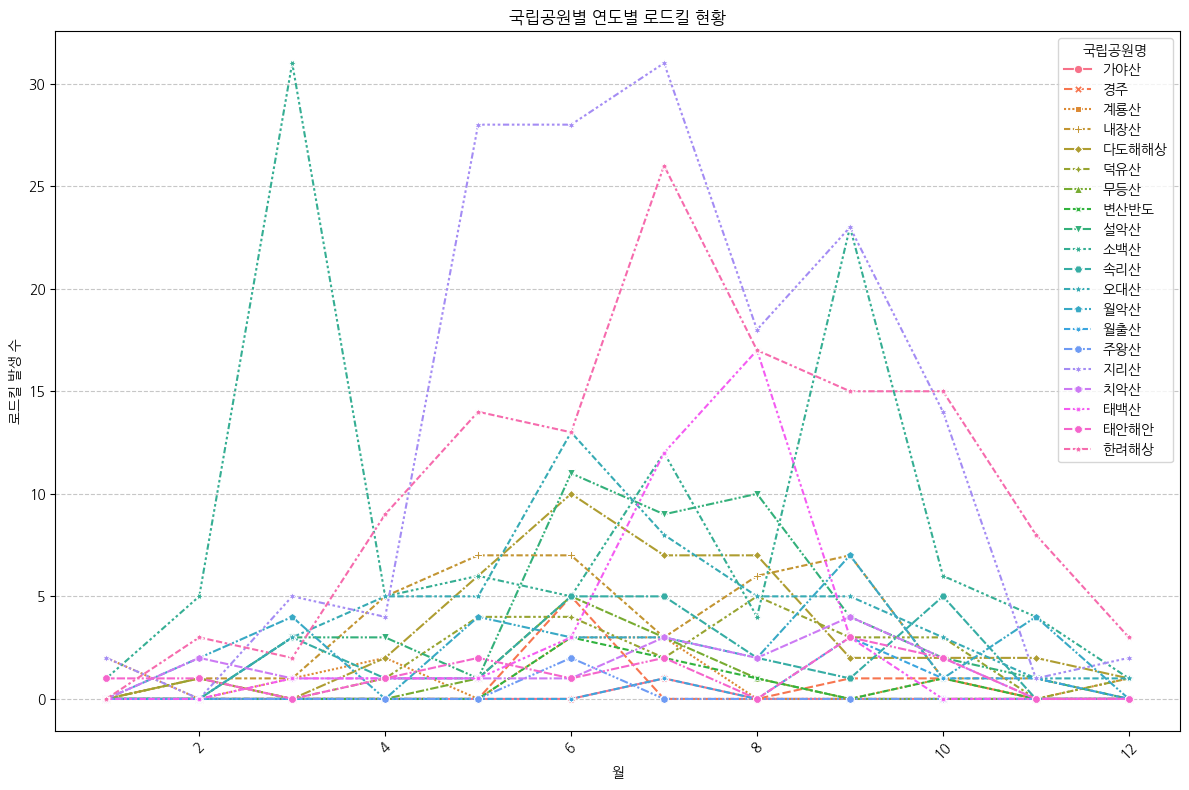

In [106]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.lineplot(data=park2_pivot, markers=True)

plt.title('국립공원별 연도별 로드킬 현황')
plt.xlabel('월')
plt.ylabel('로드킬 발생 수')
plt.xticks(rotation=45)
plt.legend(title='국립공원명', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 자원명

- 다람쥐, 고라니, 청설모, 너구리, 누룩뱀, 두꺼비가 로드킬을 많이 당한다. 
- 로드을 당하는 동물의 수가 많을수록 같은 동물이 여러 번 로드킬 당할 가능성이 높다.
- 해당 동물이 많이 살고 있는 지역에 도로가 생겨 로드킬이 발생한 가능성이 높다.

In [107]:
resource_counts = df.groupby(['자원명']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
resource_counts[:10]

,자원명,Count
14,다람쥐,204
1,고라니,81
55,청설모,73
9,너구리,37
12,누룩뱀,35
21,두꺼비,35
13,능구렁이,30
48,유혈목이,29
50,족제비,28
44,오소리,25


In [108]:
resource_counts = df.groupby(['Year', '자원명']).size().reset_index(name='Count')
resource_counts

,Year,자원명,Count
0,2019,고라니,25
1,2019,고슴도치,3
2,2019,고양이,1
3,2019,까마귀,2
4,2019,까치살모사,6
...,...,...,...
133,2022,직박구리,1
134,2022,참새,4
135,2022,청설모,9
136,2022,호랑지빠귀,1


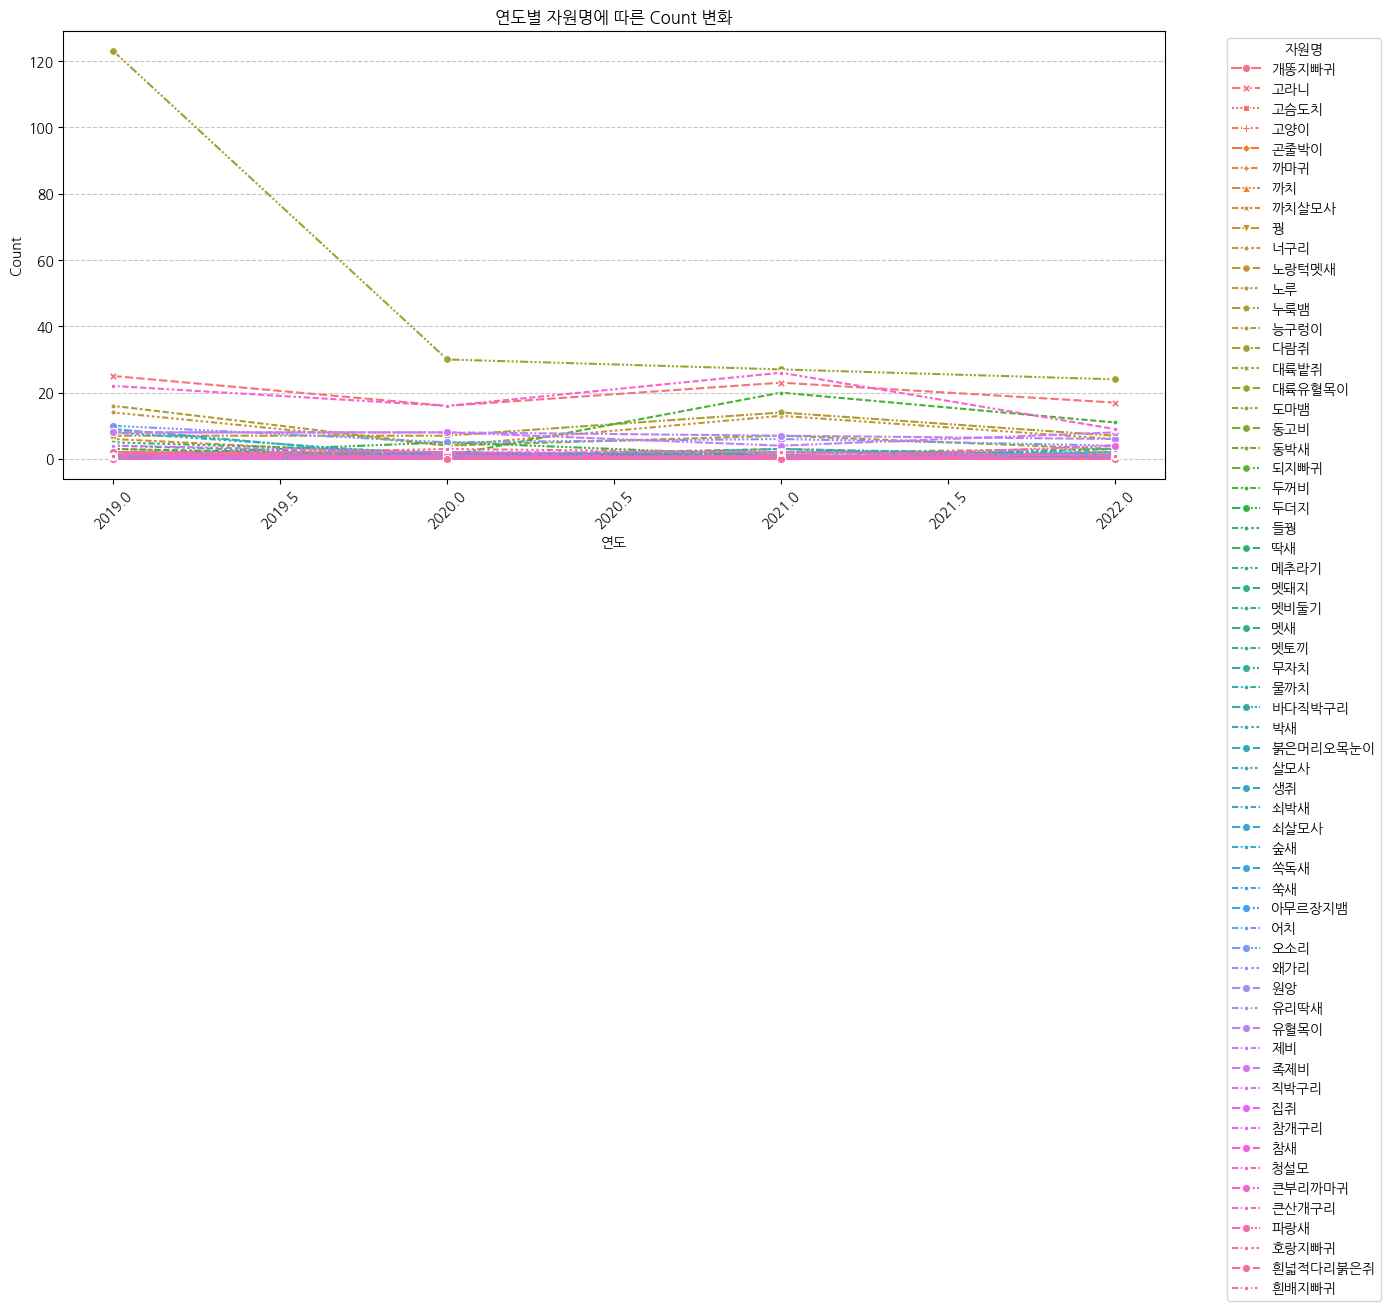

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 피벗 테이블로 변환
resource_pivot = resource_counts.pivot(index='Year', columns='자원명', values='Count').fillna(0)

# 그래프 그리기
plt.figure(figsize=(14, 10))
sns.lineplot(data=resource_pivot, markers=True)

plt.title('연도별 자원명에 따른 Count 변화')
plt.xlabel('연도')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='자원명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
df.head()

,국립공원명,조사일자,자원명,경도,위도,Year
0,한려해상,2021-10-20,멧새,128.674692,34.752264,2021
1,한려해상,2021-10-13,청설모,128.674692,34.752264,2021
2,한려해상,2021-10-11,청설모,128.674692,34.752264,2021
3,한려해상,2021-09-02,능구렁이,128.674692,34.752264,2021
4,한려해상,2021-07-27,고라니,128.674692,34.752264,2021


In [58]:
# 국립공원명과 Year별로 자원명 빈도 계산
resource_counts = df.groupby(['국립공원명', 'Year', '자원명']).size().reset_index(name='Count')

# 각 그룹별로 가장 많은 자원명 선택
most_common_resources = resource_counts.loc[resource_counts.groupby(['국립공원명', 'Year'])['Count'].idxmax()]

# 자원명(Count) 형식을 갖는 열 생성
most_common_resources['자원명(Count)'] = most_common_resources['자원명'] + '(' + most_common_resources['Count'].astype(str) + ')'

most_common_resources.reset_index(inplace=True, drop=True)

most_common_resources

,국립공원명,Year,자원명,Count,자원명(Count)
0,가야산,2019,고슴도치,1,고슴도치(1)
1,경주,2019,다람쥐,4,다람쥐(4)
2,경주,2020,유혈목이,1,유혈목이(1)
3,경주,2022,누룩뱀,1,누룩뱀(1)
4,계룡산,2019,고라니,4,고라니(4)
...,...,...,...,...,...
64,태안해안,2022,청설모,2,청설모(2)
65,한려해상,2019,청설모,6,청설모(6)
66,한려해상,2020,고라니,8,고라니(8)
67,한려해상,2021,청설모,17,청설모(17)


In [59]:
# 피벗 테이블 생성
pivot_df = most_common_resources.pivot_table(index='Year', columns='국립공원명', values='자원명(Count)', aggfunc=lambda x: x.mode()[0] if len(x) > 0 else None)

# 결과 출력
pivot_df

국립공원명,가야산,경주,계룡산,내장산,다도해해상,덕유산,무등산,변산반도,설악산,소백산,속리산,오대산,월악산,월출산,주왕산,지리산,치악산,태백산,태안해안,한려해상
Year,,,,,,,,,,,,,,,,,,,,
2019,고슴도치(1),다람쥐(4),고라니(4),다람쥐(6),능구렁이(10),너구리(3),너구리(1),NaN,다람쥐(2),다람쥐(18),다람쥐(4),다람쥐(17),고라니(3),NaN,누룩뱀(2),다람쥐(52),능구렁이(2),다람쥐(17),청설모(4),청설모(6)
2020,NaN,유혈목이(1),멧돼지(2),다람쥐(6),직박구리(1),까마귀(2),집쥐(1),고라니(1),오소리(3),유혈목이(4),다람쥐(2),다람쥐(2),다람쥐(1),NaN,NaN,다람쥐(15),너구리(1),NaN,누룩뱀(2),고라니(8)
2021,NaN,NaN,고라니(1),다람쥐(2),숲새(1),너구리(4),다람쥐(1),고라니(1),누룩뱀(5),두꺼비(20),족제비(2),다람쥐(3),누룩뱀(2),다람쥐(1),NaN,다람쥐(13),유혈목이(2),오소리(1),청설모(1),청설모(17)
2022,NaN,누룩뱀(1),너구리(1),다람쥐(4),누룩뱀(2),족제비(2),다람쥐(3),다람쥐(1),고라니(2),두꺼비(9),고라니(1),유혈목이(2),고라니(4),유혈목이(2),NaN,다람쥐(8),고라니(2),고라니(1),청설모(2),족제비(4)


### 위경도

In [140]:
import folium
from folium.plugins import HeatMap

korea = folium.Map(location=[36.55, 127.75], zoom_start=7)
HeatMap(data=df[['위도', '경도']], radius=10).add_to(korea)

korea

In [141]:
import folium

# 지도의 초기 위치와 확대 수준 설정
korea = folium.Map(location=[36.55, 127.75], zoom_start=7)

# df 데이터프레임에 있는 각 위치에 작은 빨간색 마커 추가
for idx, row in df.iterrows():
    icon = folium.Icon(color='red', icon='info-sign')
    marker = folium.Marker(
        location=[row['위도'], row['경도']],
        icon=icon
    )
    marker.add_to(korea)

# 지도 표시
korea.get_root().html.add_child(folium.Element("""
<style>
    .leaflet-marker-icon {
        width: 10px;
        height: 10px;
        margin-left: -5px;
        margin-top: -10px;
    }
</style>
"""))

korea


In [138]:
import folium
from folium.plugins import MarkerCluster

# 지도의 초기 위치와 확대 수준 설정
korea = folium.Map(location=[36.55, 127.75], zoom_start=7)

# 마커 클러스터 생성
mc = MarkerCluster()

# df 데이터프레임의 각 행에 대해 마커 추가
for _, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['국립공원명'] + ' ' + row['자원명'] + ' ' + str(row['조사일자']),
        icon=folium.Icon(color='red')  # 빨간색 마커
    ).add_to(mc)

# 마커 클러스터를 지도에 추가
korea.add_child(mc)

# 지도 표시
korea
